<h2> Machine Learning Based Cholesterol Levels Symptoms Detection Systems</h2>

<b>Lets first load required libraries:</b>

In [6]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


<b> To download the data, we will use !wget to download it from IBM Object Storage.</b>

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-08-26 16:19:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

100%[======================================>] 6,027       --.-K/s   in 0s      

2020-08-26 16:19:13 (794 MB/s) - ‘drug200.csv’ saved [6027/6027]



<b> Load Data From CSV File</b>

In [7]:
df = pd.read_csv('drug200.csv')
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h2> Let’s see how many of each EVD is in our data set</h2>

In [4]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<b> 77 HIGH cases reported Blood Pressure (BP) compared to 64 for LOW, and 59 for NORMAL. </b>

In [5]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

 <b>103 HIGH cases reported of Cholesterol level compared to 97 for NORMAL</b>

<b> Lets plot some columns to underestand data better:</b>

In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda pydotplus -y
!conda install -c anaconda python-graphviz -y
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    pydotplus-2.0.2            |             py_3          23 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py_3        anaconda

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0                --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36_0           --> 2020.6.20-py36_0

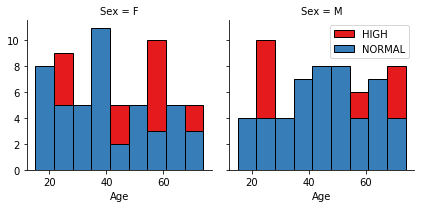

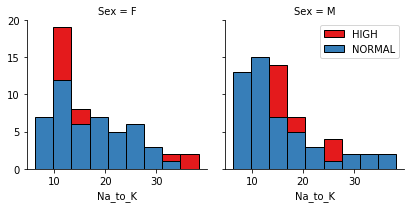

In [7]:
import seaborn as sns

bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Cholesterol", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

bins = np.linspace(df.Na_to_K.min(), df.Na_to_K.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Cholesterol", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Na_to_K', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


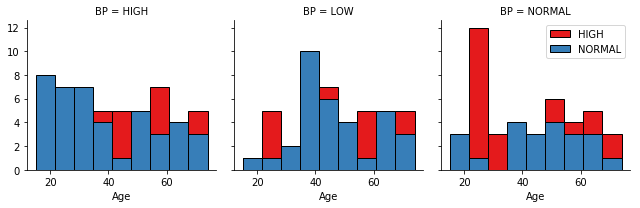

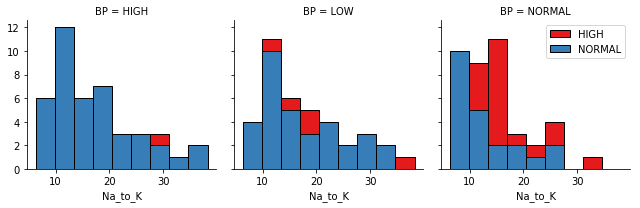

In [8]:
import seaborn as sns

bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="BP", hue="Cholesterol", palette="Set1", col_wrap=3)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

bins = np.linspace(df.Na_to_K.min(), df.Na_to_K.max(), 10)
g = sns.FacetGrid(df, col="BP", hue="Cholesterol", palette="Set1", col_wrap=3)
g.map(plt.hist, 'Na_to_K', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<h2> Pre-processing: Feature selection/extraction</h2>

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<b> Lets look at gender:</b>

In [9]:
df.groupby(['Sex'])['Cholesterol'].value_counts(normalize=True)

Sex  Cholesterol
F    HIGH           0.510417
     NORMAL         0.489583
M    HIGH           0.519231
     NORMAL         0.480769
Name: Cholesterol, dtype: float64

52% of Male Cholesteral level is HIGH while 51% of Female has HIGH Cholesterol Level. 48% of Male with NORMAL and 49% of Female has NORMAL Cholesterol Levels. Thus, Sex may not be a serious signs of Cholesterol levels.

<b> Let's look at BP:</b>

In [10]:
df.groupby(['BP'])['Cholesterol'].value_counts(normalize=True)

BP      Cholesterol
HIGH    NORMAL         0.545455
        HIGH           0.454545
LOW     NORMAL         0.515625
        HIGH           0.484375
NORMAL  HIGH           0.627119
        NORMAL         0.372881
Name: Cholesterol, dtype: float64

63% of NORMAL Blood Pressure(BP), 48% of LOW BP and 45% of HIGH BP  have HIGH Levels of Cholesterol. Thus, NORMAL Blood Pressure contribute high percentage sign of HIGH levels of Cholesterol.

<b> Let's look at Age:</b>

In [12]:
df.groupby(['Age'])['Cholesterol'].value_counts(normalize=True)

Age  Cholesterol
15   NORMAL         0.666667
     HIGH           0.333333
16   NORMAL         0.666667
     HIGH           0.333333
17   NORMAL         1.000000
18   NORMAL         0.666667
     HIGH           0.333333
19   HIGH           0.500000
     NORMAL         0.500000
20   NORMAL         0.750000
     HIGH           0.250000
21   NORMAL         1.000000
22   HIGH           0.600000
     NORMAL         0.400000
23   HIGH           0.857143
     NORMAL         0.142857
24   HIGH           0.500000
     NORMAL         0.500000
25   HIGH           1.000000
26   NORMAL         0.750000
     HIGH           0.250000
28   HIGH           0.857143
     NORMAL         0.142857
29   HIGH           1.000000
30   HIGH           1.000000
31   NORMAL         0.750000
     HIGH           0.250000
32   NORMAL         0.666667
     HIGH           0.333333
33   HIGH           1.000000
                      ...   
56   HIGH           1.000000
57   NORMAL         0.750000
     HIGH           0.2500

<b> Let's look at Na_to_K:</b>

In [13]:
df.groupby(['Na_to_K'])['Cholesterol'].value_counts(normalize=True)

Na_to_K  Cholesterol
6.269    NORMAL         1.0
6.683    NORMAL         1.0
6.769    HIGH           1.0
7.261    NORMAL         1.0
7.285    NORMAL         1.0
7.298    HIGH           1.0
7.340    NORMAL         1.0
7.477    HIGH           1.0
7.490    HIGH           1.0
7.761    HIGH           1.0
7.798    HIGH           1.0
7.845    NORMAL         1.0
8.011    HIGH           1.0
8.107    NORMAL         1.0
8.151    HIGH           1.0
8.370    NORMAL         1.0
8.607    HIGH           1.0
8.621    NORMAL         1.0
8.700    NORMAL         1.0
8.750    NORMAL         1.0
8.966    HIGH           1.0
8.968    NORMAL         1.0
9.084    HIGH           1.0
9.170    NORMAL         1.0
9.281    NORMAL         1.0
9.381    NORMAL         1.0
9.443    HIGH           1.0
9.445    NORMAL         1.0
9.475    NORMAL         1.0
9.514    NORMAL         1.0
                       ... 
25.395   HIGH           1.0
25.475   HIGH           1.0
25.741   NORMAL         1.0
25.786   HIGH           1.0

<h2> Convert Categorical features to numerical values</h2>

Lets look at gender:

In [9]:
df['Sex'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
#df['BP'].replace(to_replace=['LOW','NORMAL','HIGH'], value=[0,1,2],inplace=True)
#df['Cholesterol'].replace(to_replace=['NORMAL','HIGH'], value=[0,1],inplace=True)

df.drop(['Drug'], axis = 1,inplace=True)

df.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,HIGH,HIGH,25.355
1,47,0,LOW,HIGH,13.093
2,47,0,LOW,HIGH,10.114
3,28,1,NORMAL,HIGH,7.798
4,61,1,LOW,HIGH,18.043


<h2> Feature before One Hot Encoding </h2>

In [15]:
df.shape

(200, 5)

In [10]:
df[['BP','Age','Sex','Na_to_K']].head()

,BP,Age,Sex,Na_to_K
0,HIGH,23,1,25.355
1,LOW,47,0,13.093
2,LOW,47,0,10.114
3,NORMAL,28,1,7.798
4,LOW,61,1,18.043


<b> Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame</b>

In [11]:
Feature = df[['Age','Sex','Na_to_K']]
Feature = pd.concat([Feature,pd.get_dummies(df['BP'])], axis=1)
Feature.head(10)

,Age,Sex,Na_to_K,HIGH,LOW,NORMAL
0,23,1,25.355,1,0,0
1,47,0,13.093,0,1,0
2,47,0,10.114,0,1,0
3,28,1,7.798,0,0,1
4,61,1,18.043,0,1,0
5,22,1,8.607,0,0,1
6,49,1,16.275,0,0,1
7,41,0,11.037,0,1,0
8,60,0,15.171,0,0,1
9,43,0,19.368,0,1,0


In [8]:
#y_collection = df['Cholesterol'].replace(to_replace=['NORMAL','HIGH'], value=[0,1]).values
#y_collection[0:5]


<h2> Feature selection </h2>


<b>Lets defind feature sets, X:</b>

In [12]:
X = Feature
X[0:5]

,Age,Sex,Na_to_K,HIGH,LOW,NORMAL
0,23,1,25.355,1,0,0
1,47,0,13.093,0,1,0
2,47,0,10.114,0,1,0
3,28,1,7.798,0,0,1
4,61,1,18.043,0,1,0


<b> What are our lables?</b>

In [13]:
y = df['Cholesterol'].values
y[0:5]


array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'], dtype=object)

In [14]:
y_collection = df['Cholesterol'].replace(to_replace=['NORMAL','HIGH'], value=[0,1]).values
y_collection[0:5]

array([1, 1, 1, 1, 1])

<h2> Normalize Data </h2>


Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [15]:
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-1.29159102,  1.040833  ,  1.28652212,  1.26388393, -0.68599434,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.4151454 , -0.79121189,  1.45773797,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.82855818, -0.79121189,  1.45773797,
        -0.64686916],
       [-0.988614  ,  1.040833  , -1.14996267, -0.79121189, -0.68599434,
         1.54590766],
       [ 1.0110343 ,  1.040833  ,  0.27179427, -0.79121189,  1.45773797,
        -0.64686916],
       [-1.35218642,  1.040833  , -1.03769314, -0.79121189, -0.68599434,
         1.54590766],
       [ 0.28388946,  1.040833  ,  0.02643885, -0.79121189, -0.68599434,
         1.54590766],
       [-0.20087376, -0.96076892, -0.70046821, -0.79121189,  1.45773797,
        -0.64686916],
       [ 0.9504389 , -0.96076892, -0.12676951, -0.79121189, -0.68599434,
         1.54590766],
       [-0.07968296, -0.96076892,  0.45567206, -0.79121189,  1.45773797,
        -0.64686916]])

<h2> Classification with 75% Training dataset and 25% Testing dataset</h2>

The following algorithms were used K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine and Logistic Regression.

<h2> 1. K Nearest Neighbor(KNN)</h2>


Split the initial train set in train and cross validation set. Use 75% of the data set for training and 25% for cross validation.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)


Train set: (150, 6) (150,)
Cross validation set: (50, 6) (50,)


<b> 

Import library
</b>

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<b> Find the best k by training and predicting</b>

Train the model for various k between 1 and 9 and choose the one with the best accuracy on the cross validation set.

In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc


array([0.56, 0.56, 0.52, 0.64, 0.6 , 0.6 , 0.58, 0.64, 0.56])

<b> Display the accuracy of the model for the various K</b> 

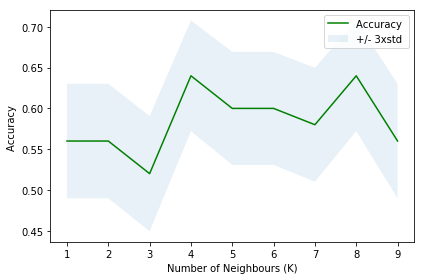

The best accuracy was 0.64 with k= 4


In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Now generate and store the model on the global train set for the optimal k = 5.

In [30]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

<h2> KNN Evaluation</h2>

<b>Jaccard index for accuracy evaluation.</b>

In [31]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score( y_cv,  yhat_cv)

0.56

In [32]:
dfr = {'Jaccard': [0, 0, 0, 0], 'F1-score': [0, 0, 0, 0], 'LogLoss': ['NA', 'NA', 'NA', 0]}
df_report = pd.DataFrame (data=dfr, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
df_report

,Jaccard,F1-score,LogLoss
KNN,0,0,NA
Decision Tree,0,0,NA
SVM,0,0,NA
LogisticRegression,0,0,0


<b> Calculate accuracy and F1 for KNN algorithm</b>

In [33]:
#yhat_test=neigh.predict(X_test)
kn_jacc_test=metrics.jaccard_similarity_score(y_cv,  yhat_cv)
kn_f1_test=metrics.f1_score(y_cv,  yhat_cv, average ='macro')
kn_cnf_matrix = confusion_matrix(y_cv,  yhat_cv)
print("Accuracy is ", kn_jacc_test, " F1 is" , kn_f1_test)
print(classification_report(y_cv,  yhat_cv))
kn_cnf_matrix


Accuracy is  0.56  F1 is 0.5592948717948718
              precision    recall  f1-score   support

        HIGH       0.60      0.56      0.58        27
      NORMAL       0.52      0.57      0.54        23

   micro avg       0.56      0.56      0.56        50
   macro avg       0.56      0.56      0.56        50
weighted avg       0.56      0.56      0.56        50



array([[15, 12],
       [10, 13]])

In [34]:
df_report.loc['KNN','Jaccard'] = kn_jacc_test
df_report.loc['KNN','F1-score'] = kn_f1_test

<h2>Decision Tree</h2>


In [35]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

<b> Import necessary libraries.</b>

In [43]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<b> Build an empty DecisionTree object with depth 5</b>

In [44]:
EmmaTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
EmmaTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.29159102,  1.040833  ,  1.28652212,  1.26388393, -0.68599434,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.4151454 , -0.79121189,  1.45773797,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.82855818, -0.79121189,  1.45773797,
        -0.64686916],
       [-0.988614  ,  1.040833  , -1.14996267, -0.79121189, -0.68599434,
         1.54590766],
       [ 1.0110343 ,  1.040833  ,  0.27179427, -0.79121189,  1.45773797,
        -0.64686916]])

<b> 

Train the decision tree using the global X data set.
</b>

In [46]:
EmmaTree.fit(X_initial, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b> Print the Decision Tree</b>

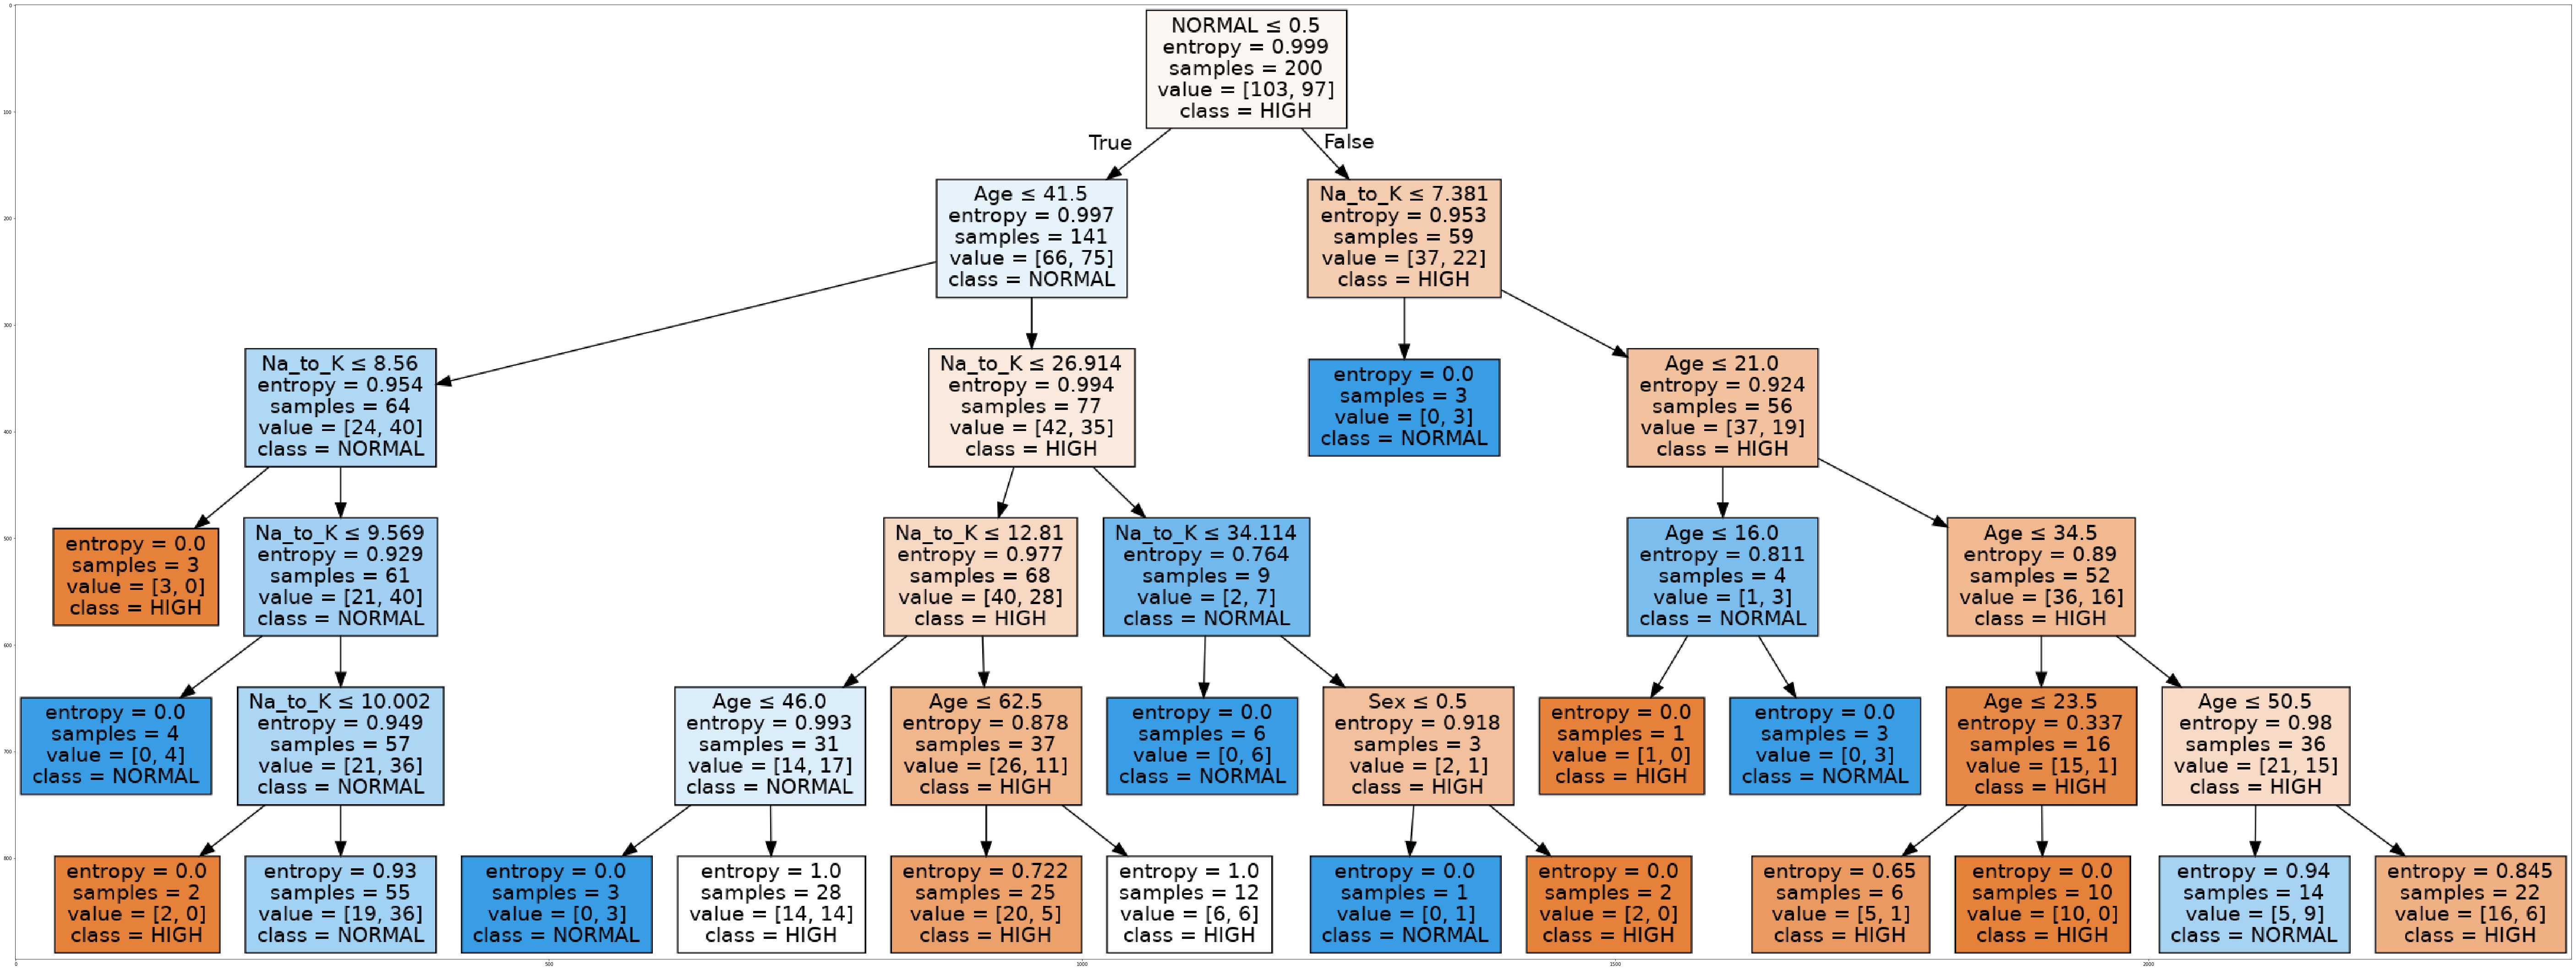

In [25]:
dot_data = StringIO()
filename = "emmatree.png"
featureNames = Feature.columns
targetNames = df['Cholesterol'].tolist()
out=tree.export_graphviz(EmmaTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [47]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

<h2> 
Evaluating the Accuracy of Decison Tree Alforithm
</h2>

<b> Use Decision Tree object previously trained.</b>

In [48]:
yhat_tree=EmmaTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_similarity_score(y, yhat_tree)
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.72  F1 is 0.7186212440960706
              precision    recall  f1-score   support

        HIGH       0.71      0.77      0.74       103
      NORMAL       0.73      0.67      0.70        97

   micro avg       0.72      0.72      0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



array([[79, 24],
       [32, 65]])

<b>Optimization of decision tree classifier performed by only pre-pruning. Let the depth be 3 </b>

In [20]:
EmmaTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
EmmaTree1 # it shows the depth of three.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.29159102,  1.040833  ,  1.28652212,  1.26388393, -0.68599434,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.4151454 , -0.79121189,  1.45773797,
        -0.64686916],
       [ 0.16269866, -0.96076892, -0.82855818, -0.79121189,  1.45773797,
        -0.64686916],
       [-0.988614  ,  1.040833  , -1.14996267, -0.79121189, -0.68599434,
         1.54590766],
       [ 1.0110343 ,  1.040833  ,  0.27179427, -0.79121189,  1.45773797,
        -0.64686916]])

In [22]:
EmmaTree1.fit(X_initial, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

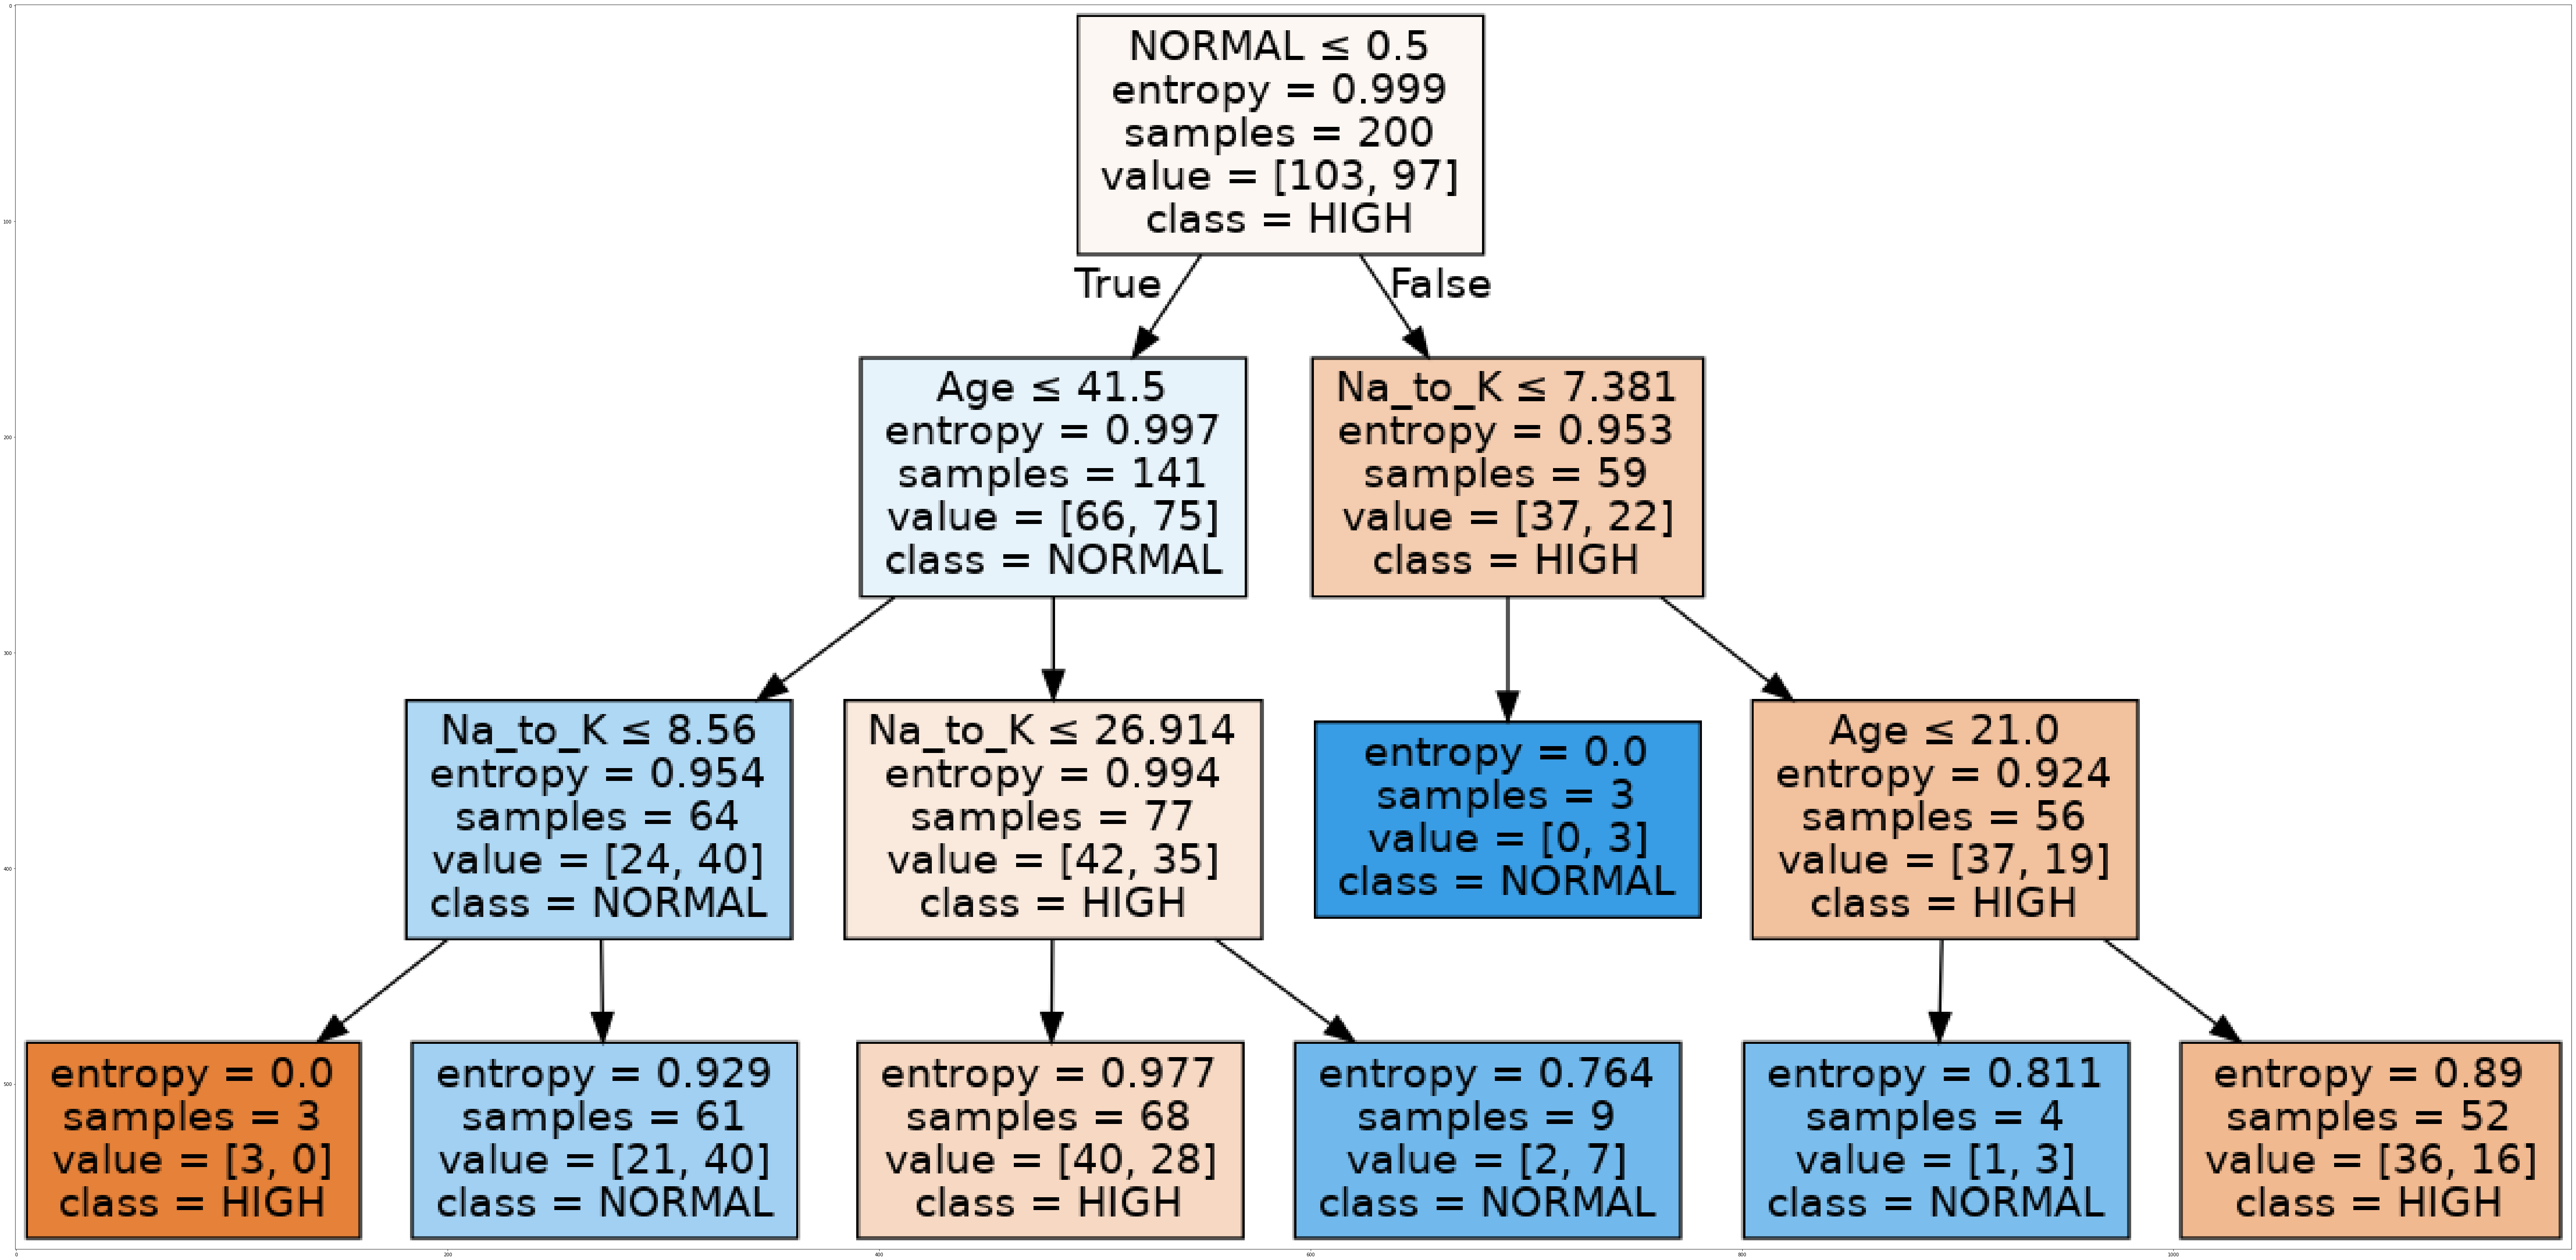

In [23]:
dot_data = StringIO()
filename = "emmatree1.png"
featureNames = Feature.columns
targetNames = df['Cholesterol'].tolist()
out=tree.export_graphviz(EmmaTree1,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [25]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

In [26]:
yhat_tree=EmmaTree1.predict(X_initial)
tree_jacc_test=metrics.jaccard_similarity_score(y, yhat_tree)
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.66  F1 is 0.6541552232733191
              precision    recall  f1-score   support

        HIGH       0.64      0.77      0.70       103
      NORMAL       0.69      0.55      0.61        97

   micro avg       0.66      0.66      0.66       200
   macro avg       0.67      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200



array([[79, 24],
       [44, 53]])

In [49]:
df_report.loc['Decision Tree','Jaccard'] = tree_jacc_test
df_report.loc['Decision Tree','F1-score'] = tree_f1_test

<h2>Support Vector Machine.</h2>

In [36]:
from sklearn import svm
EmmaSVM = svm.SVC(kernel='rbf')
EmmaSVM.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<h2> Calculate accuracy and F1 for Support Vector Machine.</h2>

<b> Use SVM object previously trained</b>

In [37]:
yhat_svm=EmmaSVM.predict(X)
svm_jacc_test=metrics.jaccard_similarity_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

Accuracy is  0.605  F1 is 0.5965167649837841
              precision    recall  f1-score   support

        HIGH       0.60      0.73      0.66       103
      NORMAL       0.62      0.47      0.54        97

   micro avg       0.60      0.60      0.60       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.61      0.60      0.60       200



array([[75, 28],
       [51, 46]])

In [38]:
df_report.loc['SVM','Jaccard'] = svm_jacc_test
df_report.loc['SVM','F1-score'] = svm_f1_test

<h2> Logistic Regression</h2>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
yhat_LR = LR.predict(X)

<h2> Calculate accuracy, F1 and log_loss for Logistic Regression.</h2>

In [40]:
yhat_proba_LR = LR.predict_proba(X)
yhat_LR=LR.predict(X)
LR_jacc_test=metrics.jaccard_similarity_score(y, yhat_LR)
LR_f1_test=metrics.f1_score(y, yhat_LR, average ='macro')
LR_cnf_matrix = confusion_matrix(y, yhat_LR)
LR_log_loss=metrics.log_loss(y, yhat_proba_LR)
print("Accuracy is ", LR_jacc_test, " F1 is" , LR_f1_test, " log_loss is", LR_log_loss)
print(classification_report(y, yhat_LR))
LR_cnf_matrix

Accuracy is  0.56  F1 is 0.5596036432789511  log_loss is 0.679260424301735
              precision    recall  f1-score   support

        HIGH       0.58      0.51      0.55       103
      NORMAL       0.54      0.61      0.57        97

   micro avg       0.56      0.56      0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



array([[53, 50],
       [38, 59]])

In [50]:
df_report.loc['LogisticRegression','Jaccard'] = LR_jacc_test
df_report.loc['LogisticRegression','F1-score'] = LR_f1_test
df_report.loc['LogisticRegression','LogLoss'] = LR_log_loss

<h2> Report</h2>

In [51]:
df_report

,Jaccard,F1-score,LogLoss
KNN,0.560,0.559295,NA
Decision Tree,0.720,0.718621,NA
SVM,0.605,0.596517,NA
LogisticRegression,0.560,0.559604,0.67926


<h2> Classification with 80% Training dataset and 20% Test dataset</h2>

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model. The following algorithms are to be used: • K Nearest Neighbor(KNN) • Decision Tree • Support Vector Machine • Logistic Regression

<h2> 
K Nearest Neighbor(KNN)
</h2>

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


<b> Find the best k by training and predicting</b>

Test set accuracy with k = 1 is 0.55
Test set accuracy with k = 2 is 0.57
Test set accuracy with k = 3 is 0.5
Test set accuracy with k = 4 is 0.57
Test set accuracy with k = 5 is 0.55
Test set accuracy with k = 6 is 0.57
Test set accuracy with k = 7 is 0.5
Test set accuracy with k = 8 is 0.6
Test set accuracy with k = 9 is 0.52
Test set accuracy with k = 10 is 0.62
Test set accuracy with k = 11 is 0.57
Test set accuracy with k = 12 is 0.62
Test set accuracy with k = 13 is 0.5
Test set accuracy with k = 14 is 0.55

Highest accuracy is achieved with k = 10


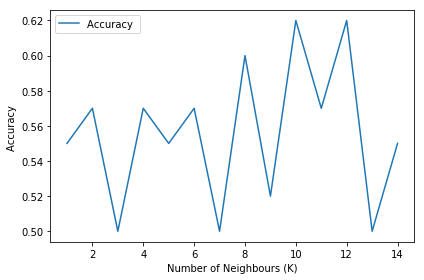

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

ks = range(1,15)
accs = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

    yhat = knn.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat),2)
    accs.append(acc)
    print("Test set accuracy with k =", k, "is", acc)
sns.lineplot(ks, accs)

bestk = ks[accs.index(max(accs))]
print("\nHighest accuracy is achieved with k =", bestk)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
knn = KNeighborsClassifier(n_neighbors = bestk).fit(X_train, y_train)

<h2> Decision Tree</h2>

Test set accuracy with depth = 5 is 0.42
Test set accuracy with depth = 6 is 0.5
Test set accuracy with depth = 7 is 0.45
Test set accuracy with depth = 8 is 0.6
Test set accuracy with depth = 9 is 0.57
Test set accuracy with depth = 10 is 0.6
Test set accuracy with depth = 11 is 0.62
Test set accuracy with depth = 12 is 0.55
Test set accuracy with depth = 13 is 0.6
Test set accuracy with depth = 14 is 0.52
Test set accuracy with depth = 15 is 0.5

Highest accuracy is achieved with depth = 11


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

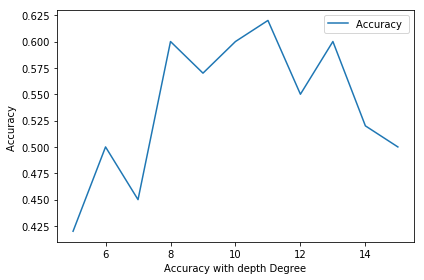

In [51]:
from sklearn.tree import DecisionTreeClassifier
ds = range(5,16)
accs = []
for d in ds:
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtree.fit(X_train, y_train)
    yhat = dtree.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with depth =", d, "is", acc)
sns.lineplot(ds, accs)

bestd = ds[accs.index(max(accs))]
print("\nHighest accuracy is achieved with depth =", bestd)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with depth Degree')
plt.tight_layout()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = bestd)
dtree.fit(X_train, y_train)

<h2> Support Vector Machine</h2>

Test set accuracy with degree = 1 is 0.65
Test set accuracy with degree = 2 is 0.6
Test set accuracy with degree = 3 is 0.57
Test set accuracy with degree = 4 is 0.6
Test set accuracy with degree = 5 is 0.48
Test set accuracy with degree = 6 is 0.57
Test set accuracy with degree = 7 is 0.55
Test set accuracy with degree = 8 is 0.62
Test set accuracy with degree = 9 is 0.52
Test set accuracy with degree = 10 is 0.57
Test set accuracy with degree = 11 is 0.55
Test set accuracy with degree = 12 is 0.6
Test set accuracy with degree = 13 is 0.57
Test set accuracy with degree = 14 is 0.62
Test set accuracy with degree = 15 is 0.57

Highest accuracy is achieved with degree = 1


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packa

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

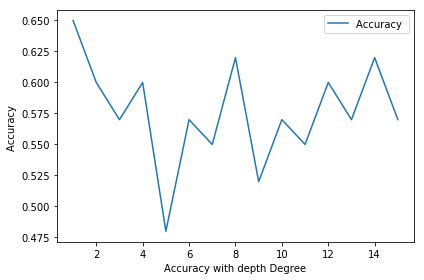

In [52]:
from sklearn import svm
degs = range(1,16)
accs = []
for deg in degs:
    svm_clf = svm.SVC(kernel='poly', degree=deg)
    svm_clf.fit(X_train, y_train)
    yhat = svm_clf.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with degree =", deg, "is", acc)
sns.lineplot(degs, accs)

bestdeg = degs[accs.index(max(accs))]
print("\nHighest accuracy is achieved with degree =", bestdeg)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with depth Degree')
plt.tight_layout()
svm_clf = svm.SVC(kernel='poly', degree=bestdeg)
svm_clf.fit(X_train, y_train)

<h2> Logistic Regression</h2>

Test set accuracy with c = 0.01 is 0.65
Test set accuracy with c = 0.02 is 0.65
Test set accuracy with c = 0.05 is 0.65
Test set accuracy with c = 0.75 is 0.65
Test set accuracy with c = 0.1 is 0.65
Test set accuracy with c = 0.5 is 0.65
Test set accuracy with c = 0.75 is 0.65
Test set accuracy with c = 1 is 0.65

Highest accuracy is achieved with c = 0.01


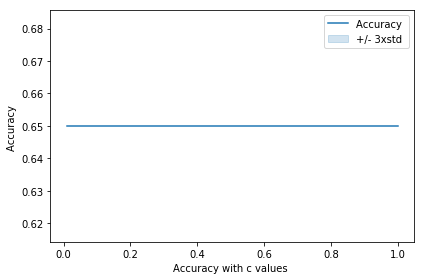

In [53]:
from sklearn.linear_model import LogisticRegression
cs = [0.01, 0.02, 0.05, 0.75, 0.1, 0.5, 0.75, 1]
accs = []
for c in cs:
    lr = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    yhat = lr.predict(X_test)
    acc = round(metrics.accuracy_score(y_test, yhat), 2)
    accs.append(acc)
    print("Test set accuracy with c =", c, "is", acc)
sns.lineplot(cs, accs)

bestc = cs[accs.index(max(accs))]
print("\nHighest accuracy is achieved with c =", bestc)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Accuracy with c values ')
plt.tight_layout()
lr = LogisticRegression(C=bestc, solver='liblinear').fit(X_train, y_train)

<h2> Deep Learning ANN</h2>

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.
